In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import platform

In [2]:
data = pd.read_csv('./new/total_data.csv')

In [3]:
beauty = data[data['대분류명']=='뷰티'].reset_index(drop=True)

<AxesSubplot:>

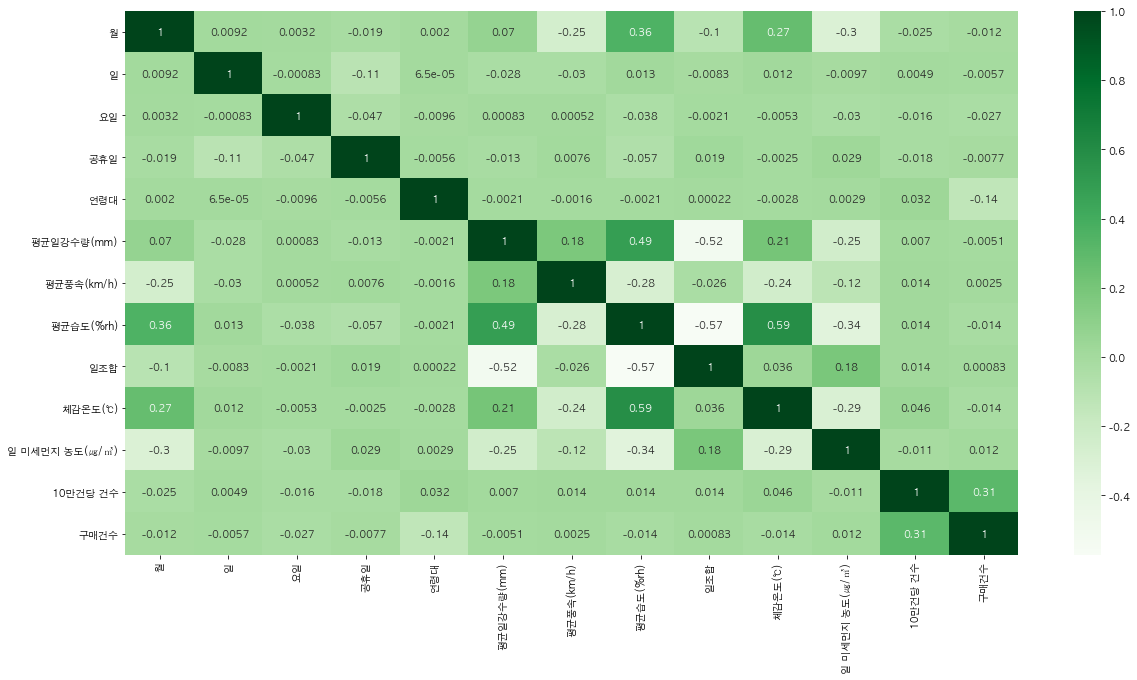

In [4]:
if platform.system() == 'Darwin':
        plt.rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

#날씨 -10만건당 건수 상관관계
plt.figure(figsize=(20,10))
sns.heatmap(beauty.corr(),annot=True,cmap='Greens')

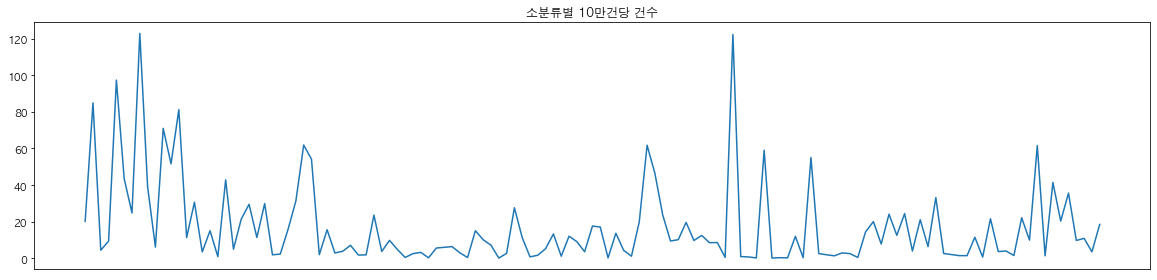

In [5]:
#10만건당 건수 

plt.figure(figsize=(20,10))
plt.subplot(211)
plt.plot(beauty.groupby('소분류명')['10만건당 건수'].mean())
plt.title('소분류별 10만건당 건수')
gg = plt.gca()
gg.axes.xaxis.set_visible(False)


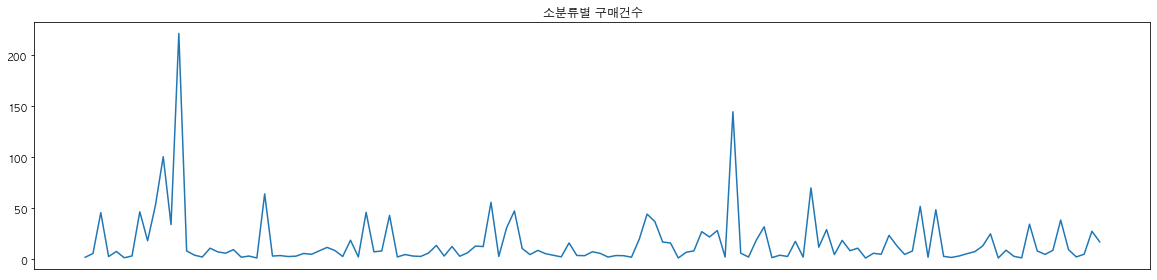

In [6]:
#소분류별 구매건수 
plt.figure(figsize=(20,10))
plt.subplot(212)
plt.plot(beauty.groupby('소분류명')['구매건수'].mean())
plt.title('소분류별 구매건수')
gg = plt.gca()
gg.axes.xaxis.set_visible(False)


In [9]:
# 대분류명,평균습도,구매건수 제외
# 결측치 제거
beauty_ = beauty.drop(['대분류명', '평균습도(%rh)', '구매건수'], axis=1)
beauty_.dropna(inplace=True)
beauty_.reset_index(drop=True, inplace=True)
print(beauty_.shape)
beauty_.head(5)

(695969, 14)


,계절,월,일,요일,공휴일,성별,연령대,소분류명,평균일강수량(mm),평균풍속(km/h),일조합,체감온도(℃),일 미세먼지 농도(㎍/㎥),10만건당 건수
0,겨울,1,1,0,1.0,F,20,기능성 링클케어 화장품,0.0,6.84,8.7,-2.810026,32.962963,12.154295
1,겨울,1,1,0,1.0,F,40,기능성 링클케어 화장품,0.0,6.84,8.7,-2.810026,32.962963,12.154295
2,겨울,1,1,0,1.0,F,20,기능성 모공관리 화장품,0.0,6.84,8.7,-2.810026,32.962963,36.000828
3,겨울,1,1,0,1.0,F,30,기능성 모공관리 화장품,0.0,6.84,8.7,-2.810026,32.962963,36.000828
4,겨울,1,1,0,1.0,F,40,기능성 모공관리 화장품,0.0,6.84,8.7,-2.810026,32.962963,36.000828


In [11]:
spring = beauty_[beauty_['계절']=='봄'].reset_index(drop=True)
print(spring.shape)
spring.head(5)

(178079, 14)


,계절,월,일,요일,공휴일,성별,연령대,소분류명,평균일강수량(mm),평균풍속(km/h),일조합,체감온도(℃),일 미세먼지 농도(㎍/㎥),10만건당 건수
0,봄,3,1,3,1.0,F,20,화장 퍼프,0.9,16.56,8.8,-1.216191,33.592593,21.806179
1,봄,3,1,3,1.0,F,30,화장 퍼프,0.9,16.56,8.8,-1.216191,33.592593,21.806179
2,봄,3,1,3,1.0,F,40,화장 퍼프,0.9,16.56,8.8,-1.216191,33.592593,21.806179
3,봄,3,1,3,1.0,F,50,화장 퍼프,0.9,16.56,8.8,-1.216191,33.592593,21.806179
4,봄,3,1,3,1.0,M,20,화장 퍼프,0.9,16.56,8.8,-1.216191,33.592593,21.806179


In [21]:
# Spring 데이터 이상치 확인
def outliers(data):
    q1, q3 = np.percentile(data, [20,80])
    i = q3 - q1
    upper_bound = q3 + (i * 1.5)
    lower_bound = q1 - (i * 1.5)
    return np.where((data < lower_bound)|(data > upper_bound))

prec = outliers(spring['평균일강수량(mm)'])[0] #강수량                    
dust = outliers(spring['일 미세먼지 농도(㎍/㎥)'])[0] #미세먼지
wind = outliers(spring['평균풍속(km/h)'])[0] #풍속

In [30]:
# 이상치 평균 처리
prec_mean=spring['평균일강수량(mm)'].mean()
spring.loc[prec,'평균일강수량(mm)'] = prec_mean

dust_mean = spring['일 미세먼지 농도(㎍/㎥)'].mean()
spring.loc[dust, '일 미세먼지 농도(㎍/㎥)'] = dust_mean

wind_mean = spring['평균풍속(km/h)'].mean()
spring.loc[wind, '평균풍속(km/h)'] = wind_mean

In [31]:
spring.head(5)

,계절,월,일,요일,공휴일,성별,연령대,소분류명,평균일강수량(mm),평균풍속(km/h),일조합,체감온도(℃),일 미세먼지 농도(㎍/㎥),10만건당 건수
0,봄,3,1,3,1.0,F,20,화장 퍼프,0.9,7.481026,8.8,-1.216191,33.592593,21.806179
1,봄,3,1,3,1.0,F,30,화장 퍼프,0.9,7.481026,8.8,-1.216191,33.592593,21.806179
2,봄,3,1,3,1.0,F,40,화장 퍼프,0.9,7.481026,8.8,-1.216191,33.592593,21.806179
3,봄,3,1,3,1.0,F,50,화장 퍼프,0.9,7.481026,8.8,-1.216191,33.592593,21.806179
4,봄,3,1,3,1.0,M,20,화장 퍼프,0.9,7.481026,8.8,-1.216191,33.592593,21.806179


<AxesSubplot:xlabel='10만건당 건수', ylabel='Density'>

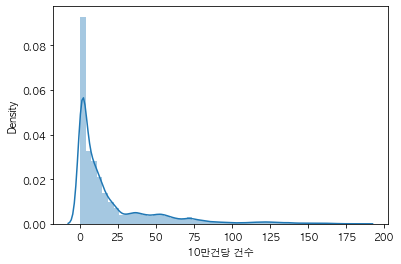

In [34]:
# 타겟값 분포확인 및 로그변환
sns.distplot(spring['10만건당 건수'])

<AxesSubplot:xlabel='10만건당 건수', ylabel='Density'>

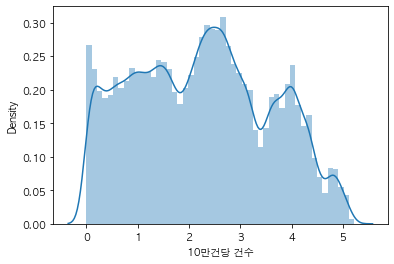

In [35]:
spring['10만건당 건수'] = np.log1p(spring["10만건당 건수"])
sns.distplot(spring['10만건당 건수'])